<a href="https://colab.research.google.com/github/rafaelcarmanhani/projeto-ru/blob/main/previsao/notebooks/Algoritmos_Area2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparando os dados

In [ ]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Importar os dados
#data = pd.read_csv('/content/dadosconcatenados_area2.csv', header=(0))
#data = pd.read_csv('/content/dadosconcatenados_area2 (1).csv', header=(0))
data = pd.read_csv('/content/dadosconcatenados_area2 (1) (2).csv', header=(0))

#Remover colunas
data.drop(columns=['Ano','Aluno', 'Bolsista', 'Pos_Doc',
       'Aluno_Externo', 'Funcionario', 'Visitante', 'Comunidade', 'sobremesa_2','refeicao'], inplace=True)

#Remover Nan
data = data.dropna()
data = data.drop_duplicates()

In [ ]:
# --- AGRUPAR CARDAPIO ---

def agrupar_nomes(data, xlsx, sheet_name, column_in_data):
  data_agrupamento = pd.read_excel(xlsx, sheet_name, header=(0))

  # Transpor para ficar mais fácil de tratar
  data_agrupamento_transposed = data_agrupamento.T

  #Itere pela coluna, pegue todos os valores dela
  grupos = []

  for name, col in data_agrupamento_transposed.items():
    #Remove os nans
    categoria_variacoes = list(filter(lambda x: not pd.isna(x), col.values))
    grupos.append(categoria_variacoes)


  # -----------------------
  # Substitui nomes

  # Criar dicionário
  substituicoes = {}

  #Aplicando a substituição
  for array_categoria in grupos:
    substituicoes[array_categoria[0]] = array_categoria


  for prato_padrao, variacoes in substituicoes.items():
      data[column_in_data] = data[column_in_data].replace(variacoes, prato_padrao)

  return data


In [ ]:
#--- AGRUPAR CARDAPIO ---

data['prato_principal_1'] = data['prato_principal_1'].str.strip()
data['prato_principal_2'] = data['prato_principal_2'].str.strip()
data['guarnição'] = data['guarnição'].str.strip()
data['sobremesa_1'] = data['sobremesa_1'].str.strip()


#Importar os dados

xlsx = pd.ExcelFile('/content/agrupamento_de_nomes.xlsx')

data = agrupar_nomes(data, xlsx, 'Carnes', 'prato_principal_1')
data = agrupar_nomes(data, xlsx, 'Vegetariano', 'prato_principal_2')
data = agrupar_nomes(data, xlsx, 'Guarnição', 'guarnição')
data = agrupar_nomes(data, xlsx, 'Sobremesa doce', 'sobremesa_1')



In [ ]:
print(data.columns)

Index(['Mês', 'Dia_semana', 'Dia_mês', 'Total', 'prato_principal_1',
       'prato_principal_2', 'guarnição', 'sobremesa_1', 'Precipitacao_mm',
       'Temp_max_C', 'Temp_min_C', 'Umid_rel_ar',
       'Vento_velocidade_horaria (m/s)', 'Vento_rajada_maxima (m/s)',
       'dia letivo'],
      dtype='object')


In [ ]:
data.head(10)

,Mês,Dia_semana,Dia_mês,Total,prato_principal_1,prato_principal_2,guarnição,sobremesa_1,Precipitacao_mm,Temp_max_C,Temp_min_C,Umid_rel_ar,Vento_velocidade_horaria (m/s),Vento_rajada_maxima (m/s),dia letivo
0,2,seg,27,78.0,Frango empanado,Ovo cozido,Creme de milho,Barra de cereais,0.000000,29.566667,26.500000,59.333333,1.233333,6.033333,0
1,2,ter,28,105.0,Carne em cubos,PVT,Macarrão,Iogurte,0.000000,28.233333,26.533333,60.000000,2.433333,6.533333,0
2,3,qua,1,110.0,Bife,Bife de lentilha,Legumes,Picolé,0.000000,24.666667,22.700000,71.333333,0.700000,3.733333,0
3,3,qui,2,118.0,Lombo,Curry de legumes,Polenta,Brigadeirão,0.000000,28.533333,27.000000,47.666667,1.700000,6.133333,0
4,3,sex,3,101.0,frango assado,Cassoulet,Purês,Goiabada,0.000000,28.233333,26.533333,58.666667,1.833333,6.533333,0
5,3,seg,6,114.0,Frango empanado,Fricassê de PVT,Legumes,Doce de leite,0.000000,27.666667,25.800000,57.333333,1.800000,5.733333,0
6,3,ter,7,135.0,Lasanha bolonhesa,Lasanha de PVT,Acelga,Bananada,0.000000,26.900000,24.700000,59.333333,2.533333,6.366667,0
7,3,qua,8,146.0,Estrogonofe de frango,Estrogonofe de PVT,Batata palha,Mousse de maracujá,0.000000,27.500000,25.600000,56.666667,2.300000,5.566667,0
8,3,qui,9,159.0,Hamburguer,Hamburguer de grão de bico,Macarrão,Bombom,0.000000,27.233333,25.133333,64.666667,1.300000,5.300000,0
9,3,sex,10,84.0,Lombo,Ovo frito,Couve,Sagu,0.266667,24.966667,23.033333,74.333333,1.333333,4.966667,0


In [ ]:
#Aplicando One Hot Encoding nas variáveis categóricas
data = pd.get_dummies(data, columns=['Mês','Dia_semana','Dia_mês','prato_principal_1', 'prato_principal_2', 'guarnição', 'sobremesa_1'])

#Guardando os atributos
atributos = data.drop(columns=['Total']).columns

In [ ]:
print(data.columns)

Index(['Total', 'Precipitacao_mm', 'Temp_max_C', 'Temp_min_C', 'Umid_rel_ar',
       'Vento_velocidade_horaria (m/s)', 'Vento_rajada_maxima (m/s)',
       'dia letivo', 'Mês_1', 'Mês_2',
       ...
       'sobremesa_1_Pudim de pão', 'sobremesa_1_Pão de mel',
       'sobremesa_1_Pé de moça', 'sobremesa_1_Rocambole de chocolate',
       'sobremesa_1_Romeu', 'sobremesa_1_Sagu', 'sobremesa_1_Sorvete',
       'sobremesa_1_Surpresa de abacaxi', 'sobremesa_1_Surpresa de banana',
       'sobremesa_1_Torrone'],
      dtype='object', length=213)


Double Machine Learning

In [ ]:
!pip install doubleml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.4/540.4 kB 10.3 MB/s eta 0:00:00


In [ ]:
from doubleml import DoubleMLData
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from doubleml.plm import DoubleMLPLR

#Define Y (objetivo)
y_col = 'Total'

#Define D (Variável que queremos saber o impacto)
treatment_prefixes = [
    'prato_principal_1_',
    'prato_principal_2_',
    'guarnição_',
    'sobremesa_1_'
]

d_cols = [c for c in data.columns
          if any(c.startswith(p) for p in treatment_prefixes)]

#Define X (Variáveis de Confusão)
x_cols = [c for c in data.columns if c not in d_cols + [y_col]]

#Criar o objeto do doubleml
dml_data = DoubleMLData(
    data,
    y_col=y_col,
    d_cols=d_cols,
    x_cols=x_cols
)

#Escolher os modelos ML
#ml_y = RandomForestRegressor(n_estimators=50, random_state=0)
ml_m = RandomForestClassifier(
    n_estimators=50,
    random_state=0
)
ml_l = RandomForestRegressor(n_estimators=50, random_state=0)

#Rodar
dml_plr = DoubleMLPLR(
    dml_data,
    #ml_g=ml_y,    # modelo para Total ~ X
    ml_m=ml_m,    # modelo para D ~ X
    ml_l=ml_l,    # modelo para Total ~ D + X
    n_folds=3
)
dml_plr.fit()

#Resultados
print(dml_plr.summary)


/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

                                        coef    std err         t     P>|t|  \
prato_principal_1_Bife             -1.965159  11.832003 -0.166088  0.868087   
prato_principal_1_Bisteca         -34.062439  34.030309 -1.000944  0.316854   
prato_principal_1_Carne de panela  90.632580  29.349855  3.088008  0.002015   
prato_principal_1_Carne em cubos  -38.703308  21.875511 -1.769253  0.076852   
prato_principal_1_Carne louca       6.528261  35.519015  0.183796  0.854173   
...                                      ...        ...       ...       ...   
sobremesa_1_Sagu                  -10.760116  24.126807 -0.445982  0.655610   
sobremesa_1_Sorvete                56.081429  20.723906  2.706123  0.006807   
sobremesa_1_Surpresa de abacaxi     6.468437  16.416394  0.394023  0.693564   
sobremesa_1_Surpresa de banana      4.506822  43.967389  0.102504  0.918357   
sobremesa_1_Torrone               -22.518310  17.340841 -1.298571  0.194091   

                                        2.5 %      

/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(


In [ ]:
for nome, valor in zip(d_cols, dml_plr.coef):
    print(nome, "→", valor)


prato_principal_1_Bife → -1.9651587903293684
prato_principal_1_Bisteca → -34.06243929512974
prato_principal_1_Carne de panela → 90.63257956448913
prato_principal_1_Carne em cubos → -38.70330758244612
prato_principal_1_Carne louca → 6.528261043854715
prato_principal_1_Carne moída → 7.207642790814813
prato_principal_1_Cubos de pernil → 51.78563079560507
prato_principal_1_Estrogonofe de carne → 69.22266965374472
prato_principal_1_Estrogonofe de frango → -8.656973807634026
prato_principal_1_Feijoada → 44.22847736625513
prato_principal_1_File de peixe ou frango → 6.911923076923087
prato_principal_1_Filé de coxa → 67.84455066921603
prato_principal_1_Filé de frango → 14.22268410185823
prato_principal_1_Filé de peixe → -90.19796088918602
prato_principal_1_Frango cremoso → 174.43965176098143
prato_principal_1_Frango empanado → -11.442026181724376
prato_principal_1_Frango xadrez → 191.9401151631478
prato_principal_1_Fricassê de frango → 11.957526110997355
prato_principal_1_Hamburguer → 25.486784

Sem validação cruzada externa

In [ ]:
#---SEPARANDO TREINO E TESTE---

# valor a ser predito
ylabel = 'Total'

# separa y e X
y = data[ylabel]
X = data.drop(columns=[ylabel])

#Guardar originais
y_original = y
X_original = X

# transforma em numpy
y = y.to_numpy()
X = X.to_numpy()

# divide o conjunto em treinamento e teste
p = 0.2 # fracao de elementos no conjnto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p,random_state=42)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

#O Pearson mede a relação linear entre duas variáveis
#O Spearman mede a relação monotônica, avaliando se uma variável
#tende a aumentar ou diminuir conforme a outra, sem exigir linearidade.

#Filtrar apenas colunas de alimentos
alimentos_cols = [col for col in X_original.columns if
                  any(x in col for x in ["prato","guarn","salada","sobremesa"])]
X_alimentos = X_original[alimentos_cols]
y = data['Total']
df_corr = X_alimentos.copy()
df_corr['Total'] = y

#Calcular correlação Pearson e Spearman
pearson_corr = df_corr.corr(method='pearson')['Total'].drop('Total')
spearman_corr = df_corr.corr(method='spearman')['Total'].drop('Total')

#Juntar em um único DataFrame
corr_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

#Ordenar pelo Pearson
corr_df_sorted = corr_df.sort_values(by='Pearson', ascending=False)
print("Correlação de cada alimento com Total (Pearson e Spearman):\n")
print(corr_df_sorted)


Correlação de cada alimento com Total (Pearson e Spearman):

                                                     Pearson  Spearman
prato_principal_1_Carne de panela                   0.114057  0.127517
sobremesa_1_Gelatina                                0.105134  0.103892
prato_principal_2_Grãos gratinados                  0.088120  0.082379
sobremesa_1_Sorvete                                 0.083095  0.092249
guarnição_Macarrão                                  0.081702  0.079193
sobremesa_1_Doce de banana                          0.081322  0.072155
prato_principal_2_Esctrogonofe de legumes           0.074919  0.085686
prato_principal_1_Estrogonofe de carne              0.074558  0.083950
prato_principal_2_almôndega de pvt ao sugo          0.071633  0.075591
prato_principal_1_bife ao molho provençal           0.066137  0.069439
prato_principal_2_PVT                               0.065919  0.065462
sobremesa_1_Doce de leite                           0.065273  0.059684
prato_principal_

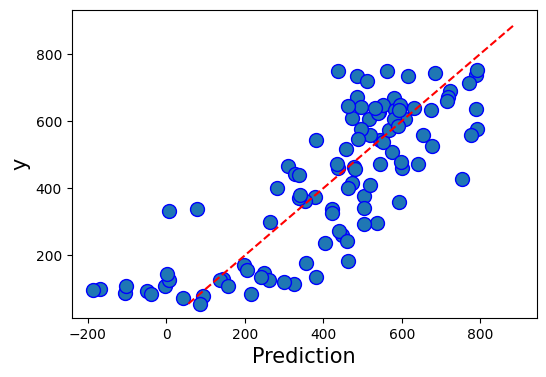

R2: 0.5738834314952175


In [ ]:
#----REGRESSÃO LINEAR MÚLTIPLA----

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

#vizualizar o resultado

fig = plt.figure(figsize=(6,4))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

#calcular R2
R2_reg = r2_score(y_test, y_pred)
print('R2:', R2_reg)

Melhor alpha encontrado: 1.5494880345518425
R2: 0.8140430474221149
RMSE: 92.66789462043984


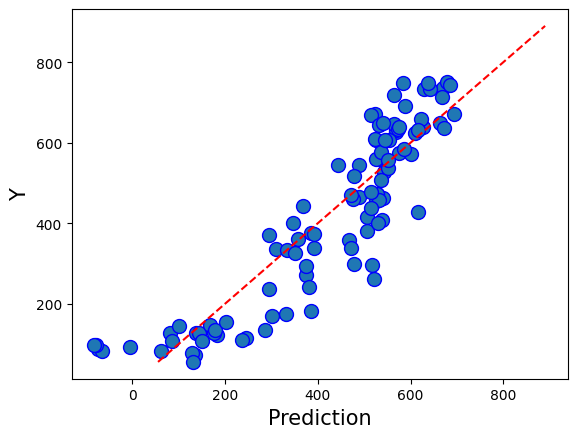

In [ ]:
#----LASSO----

from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# Treinando o modelo Lasso com validação cruzada 5 k-folds para escolher o melhor hiperparâmetro alpha
lasso = LassoCV(alphas=None, cv=5, max_iter=100000,random_state=42)
lasso.fit(X_train, y_train)

alpha_lasso = lasso.alpha_
print("Melhor alpha encontrado:", alpha_lasso)

# Previsões
y_pred = lasso.predict(X_test)

R2_lasso = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2:", R2_lasso)
print("RMSE:", RMSE)

#Plotar
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [ ]:
#Verificando os atributos zerados pelo LASSO

# Cria uma lista de tuplas (atributo, coeficiente)
coef_atributos = list(zip(atributos, lasso.coef_))

# Ordena pelo valor absoluto do coeficiente, do maior para o menor
coef_atributos_ordenados = sorted(coef_atributos, key=lambda x: abs(x[1]), reverse=True)

# Imprime
for atributo, coef in coef_atributos_ordenados:
    print(f'{atributo}: {coef}')


dia letivo: 388.08369869865385
Mês_12: -214.38931769894077
Dia_semana_sex: -166.62000199487522
Mês_4: 107.42821602375454
Mês_3: 103.28628886157007
Mês_5: 82.84917755494853
prato_principal_1_Filé de peixe: -65.7968243832145
Mês_7: -57.362042324189495
Dia_semana_ter: 45.14321364693549
Mês_11: -43.6482814522978
Mês_8: 27.273367743271596
prato_principal_1_Estrogonofe de carne: 14.86447739316148
Precipitacao_mm: 13.939800107654
Mês_9: 13.369801588625293
guarnição_Macarrão: 12.915714750791484
sobremesa_1_Bombom: 10.791039510076994
prato_principal_2_Ovo frito: -8.864356480054541
prato_principal_1_Carne em cubos: -6.475075123174667
guarnição_Virado: -6.112107428751282
Dia_semana_seg: -5.892125115111135
Dia_semana_qua: 3.31394939723399
sobremesa_1_Bolinho: -1.9801587313082685
Vento_rajada_maxima (m/s): 1.9315300269410507
Temp_min_C: -1.4382577444324842
sobremesa_1_Sorvete: 1.0969126858815794
Umid_rel_ar: -0.38611044285067453
Temp_max_C: -0.0
Vento_velocidade_horaria (m/s): -0.0
Mês_1: -0.0
Mês_

Com validação cruzada externa

Fold 1: R² = 0.5739


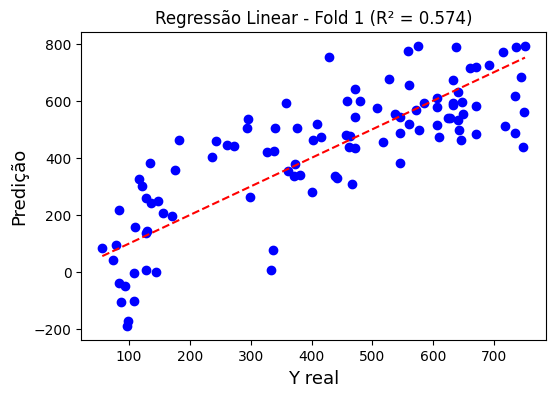

Fold 2: R² = 0.5653


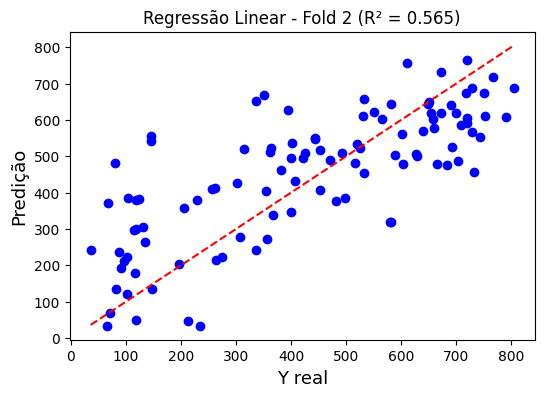

Fold 3: R² = 0.6599


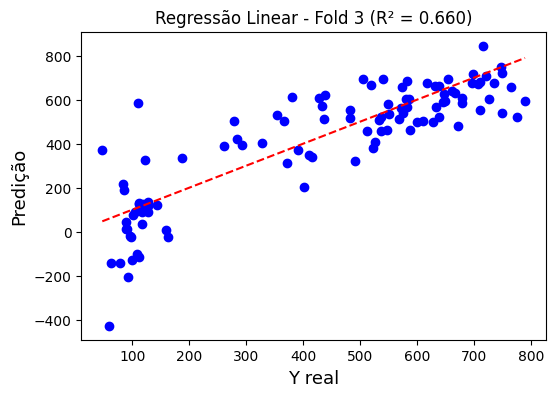

Fold 4: R² = 0.7345


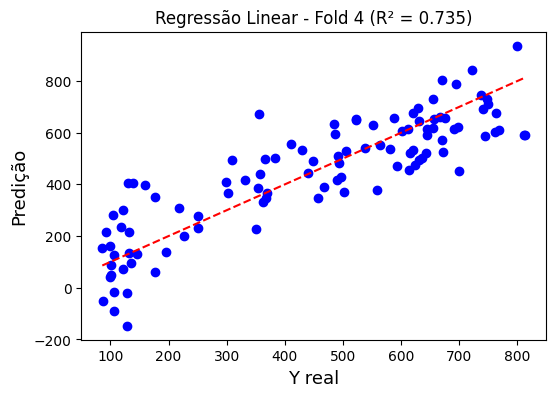

Fold 5: R² = 0.6961


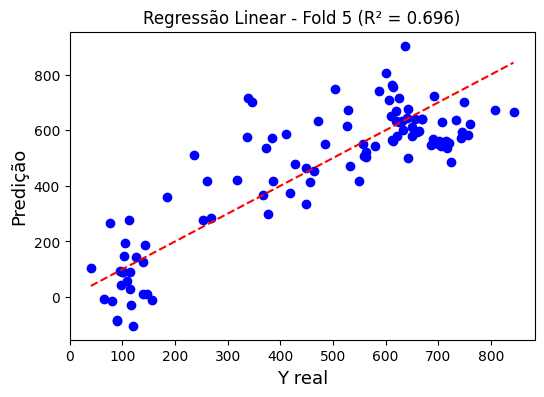


R² médio: 0.6459318849279627
Desvio padrão do R²: 0.06670214550187517


In [ ]:
#----REGRESSÃO LINEAR MÚLTIPLA----

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# valor a ser predito
ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []
fold = 1

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lm = LinearRegression()
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    #Métricas
    R2 = r2_score(y_test, y_pred)
    lista_r2.append(R2)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R² = {R2:.4f}")

    # ---- Plot ----
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, color='blue')
    plt.xlabel("Y real", fontsize=13)
    plt.ylabel("Predição", fontsize=13)
    plt.title(f"Regressão Linear - Fold {fold} (R² = {R2:.3f})")

    # linha y=x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')

    plt.show()

    fold += 1

r2_reg_lin_mult = np.mean(lista_r2)
r2_dp_reg_lin_mult = np.std(lista_r2)
rmse_reg_lin_mult = np.mean(lista_rmse)
rmse_dp_reg_lin_mult = np.std(lista_rmse)
print("\nR² médio:", r2_reg_lin_mult)
print("Desvio padrão do R²:", r2_dp_reg_lin_mult)

Fold 1: hiperparâmetro alpha escolhido = 1.09313, R2 = 0.8136


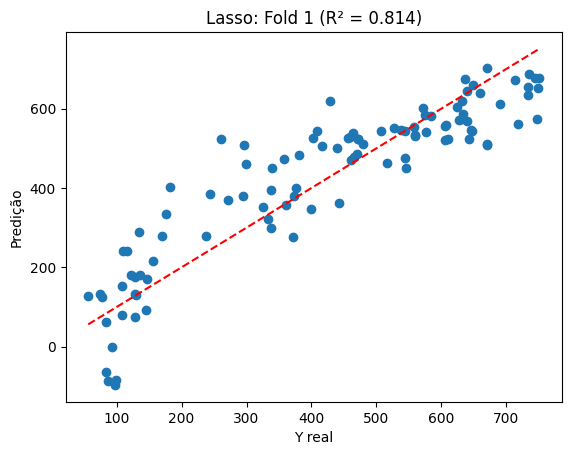

Fold 2: hiperparâmetro alpha escolhido = 0.67329, R2 = 0.7382


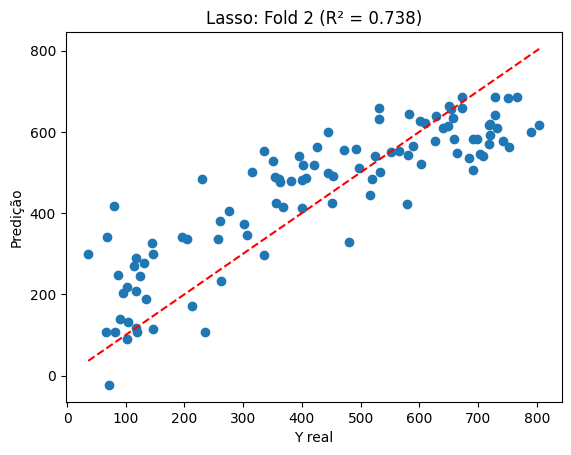

Fold 3: hiperparâmetro alpha escolhido = 0.71260, R2 = 0.7991


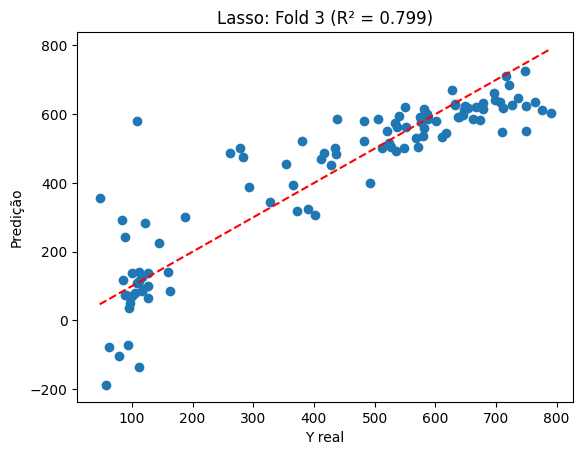

Fold 4: hiperparâmetro alpha escolhido = 0.88423, R2 = 0.8026


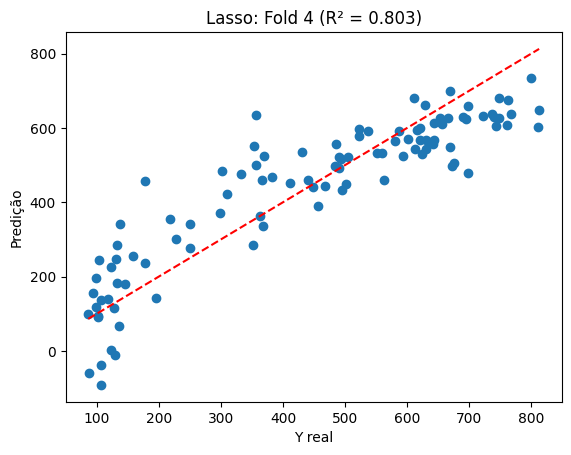

Fold 5: hiperparâmetro alpha escolhido = 1.14094, R2 = 0.8231


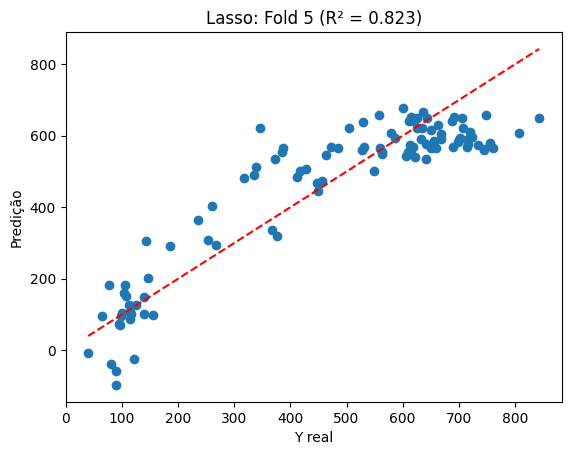


R2 médio no K-Fold: 0.7953445248612248
Desvio padrão do R2: 0.029773398389042645


In [ ]:
#---LASSO---

from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# valor a ser predito
ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True,random_state=42)

lista_r2 = [] # para armezar o R2 de cada fold
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    # separa treino e teste do fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # LassoCV calcula o melhor alpha usando k-fold interno nos dados de treino do k-fold externo
    lasso = LassoCV(cv=5, max_iter=100000,random_state=42)
    lasso.fit(X_train, y_train)

    # previsão no teste
    y_pred = lasso.predict(X_test)

    # Métricas
    R2 = r2_score(y_test, y_pred)
    lista_r2.append(R2)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: hiperparâmetro alpha escolhido = {lasso.alpha_:.5f}, R2 = {R2:.4f}")

    # ---- Plot do fold ----
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Lasso: Fold {fold} (R² = {R2:.3f})")

    # linha y=x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.show()

    fold += 1

# Média dos R2 ao final
r2_lasso = np.mean(lista_r2)
r2_dp_lasso = np.std(lista_r2)
rmse_lasso = np.mean(lista_rmse)
rmse_dp_lasso = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_lasso)
print("Desvio padrão do R2:", r2_dp_lasso)


Fold 1: R2 = 0.8270, RMSE = 89.381


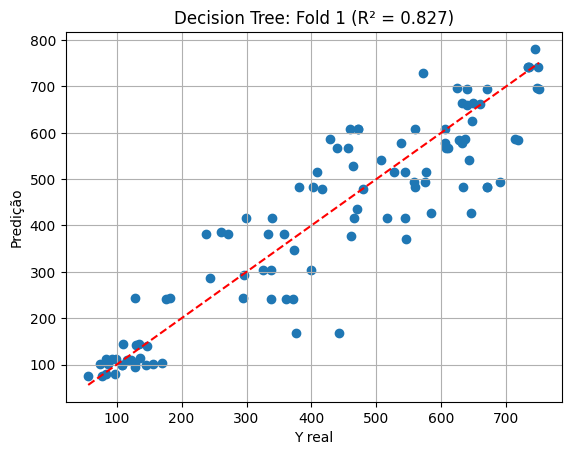

Fold 2: R2 = 0.7645, RMSE = 111.110


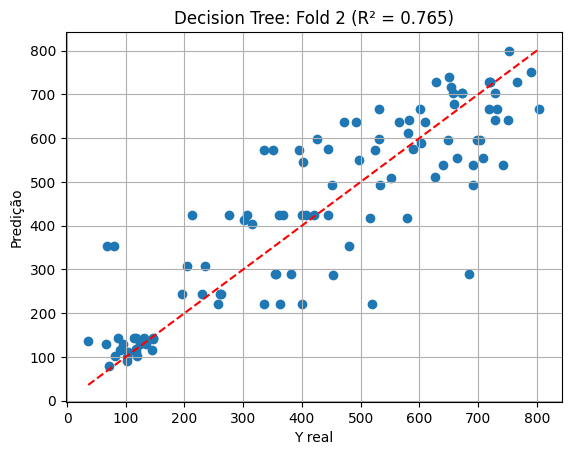

Fold 3: R2 = 0.8040, RMSE = 105.360


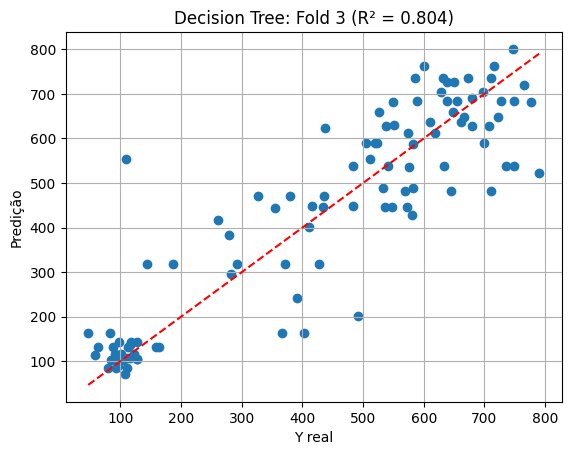

Fold 4: R2 = 0.8059, RMSE = 101.037


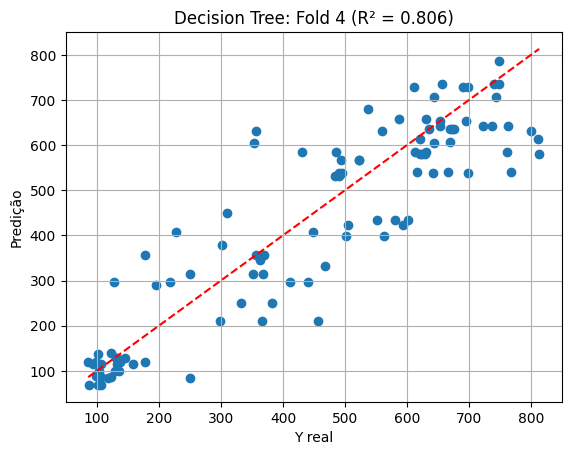

Fold 5: R2 = 0.8283, RMSE = 97.482


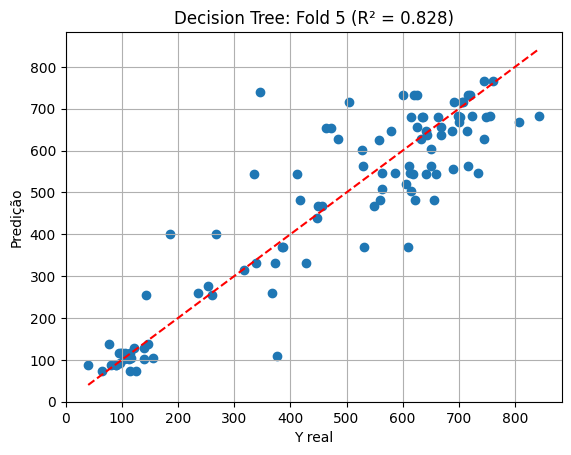


R2 médio no K-Fold: 0.8059537642472201
Desvio padrão do R2: 0.02307998946568778


In [ ]:
# --- Decision Tree Regressor ---

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #ajuste dos hiperparâmetros
    tree = DecisionTreeRegressor(
        max_depth=15,           # controla a profundidade da árvore
        min_samples_split=10,   # exige pelo menos 10 amostras para dividir um nó
        min_samples_leaf=4,     # cada folha precisa ter pelo menos 4 amostras
        random_state=42
    )
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Decision Tree: Fold {fold} (R² = {R2:.3f})")

    # linha y=x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.show()

    fold += 1

r2_decision_tree = np.mean(lista_r2)
r2_dp_decision_tree = np.std(lista_r2)
rmse_decision_tree = np.mean(lista_rmse)
rmse_dp_decision_tree = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_decision_tree)
print("Desvio padrão do R2:", r2_dp_decision_tree)


Fold 1: R2 = 0.8606, RMSE = 80.224


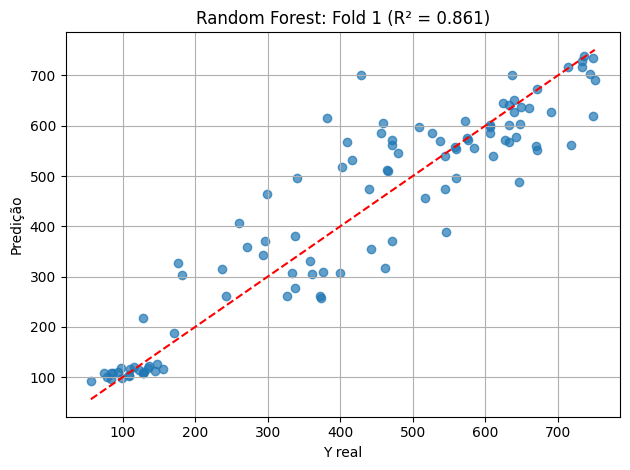

Fold 2: R2 = 0.8360, RMSE = 92.725


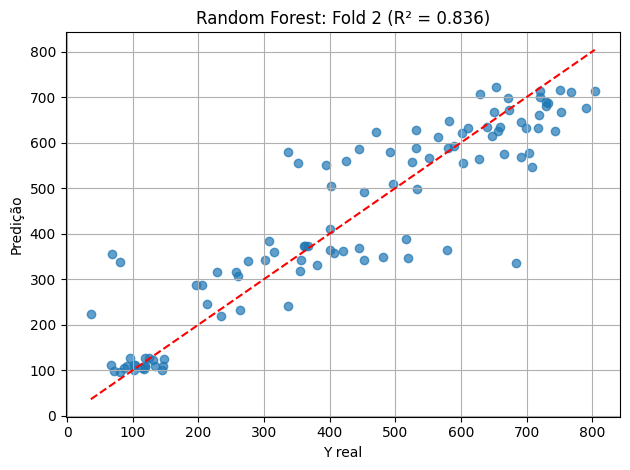

Fold 3: R2 = 0.8746, RMSE = 84.292


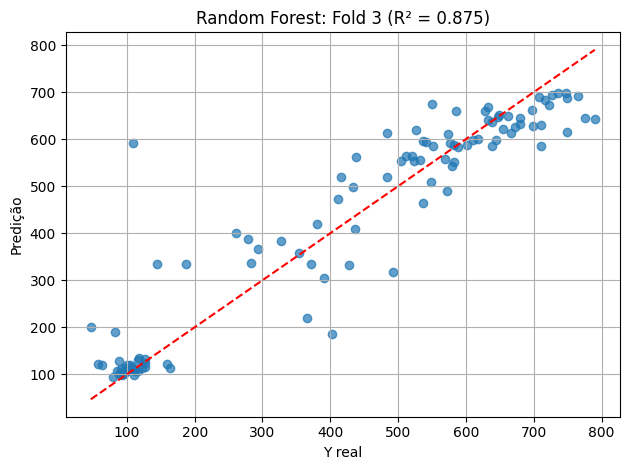

Fold 4: R2 = 0.8783, RMSE = 80.007


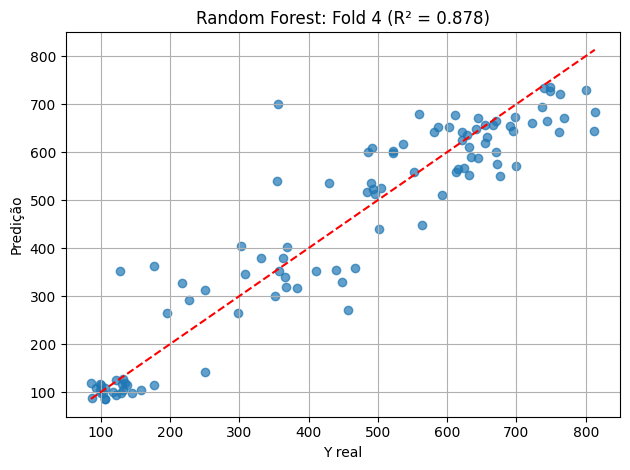

Fold 5: R2 = 0.8651, RMSE = 86.408


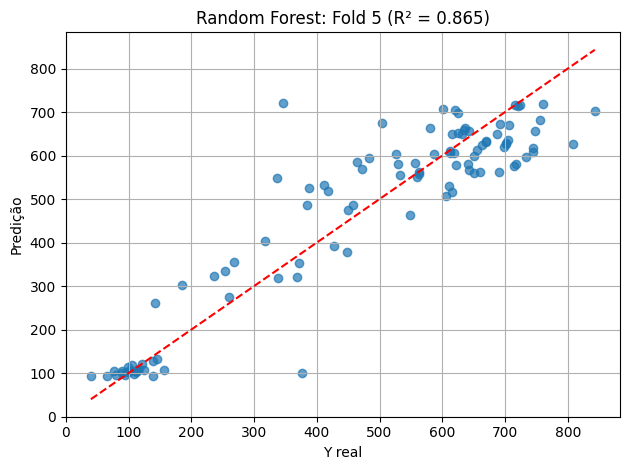


R2 médio no K-Fold: 0.8629209120042118
Desvio padrão do R2: 0.014872831149393622


In [ ]:
# --- Random Forest Regressor ---

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    # separa treino e teste do fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # modelo Random Forest
    rf = RandomForestRegressor(
        n_estimators=300,      # número de árvores
        max_depth=30,        # limitar a profundidade
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
    )

    rf.fit(X_train, y_train)

    # previsão
    y_pred = rf.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Random Forest: Fold {fold} (R² = {R2:.3f})")
    plt.grid(True)

    # linha y = x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.tight_layout()
    plt.show()

    fold += 1

# Resultados finais

r2_random_forest = np.mean(lista_r2)
r2_dp_random_forest = np.std(lista_r2)
rmse_random_forest = np.mean(lista_rmse)
rmse_dp_random_forest = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_random_forest)
print("Desvio padrão do R2:", r2_dp_random_forest)



Fold 1: alpha = 45.34879, R2 = 0.6914, RMSE = 119.380


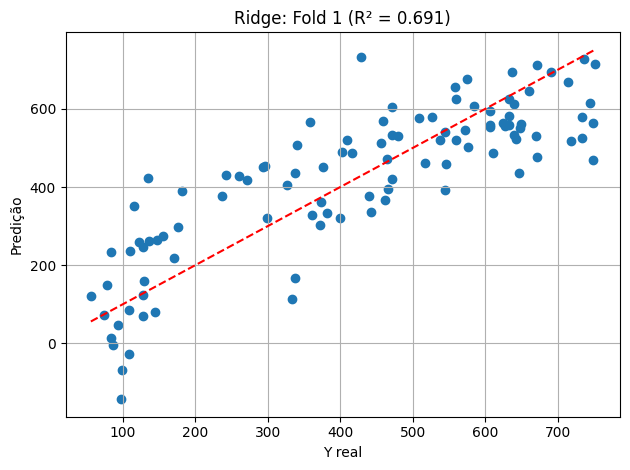

Fold 2: alpha = 45.34879, R2 = 0.5728, RMSE = 149.664


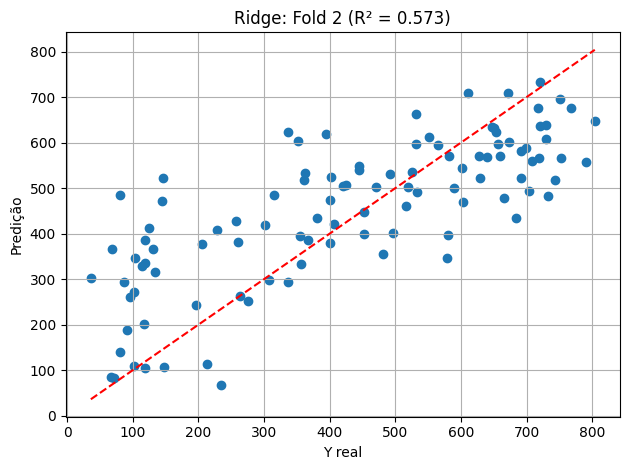

Fold 3: alpha = 54.62277, R2 = 0.7511, RMSE = 118.736


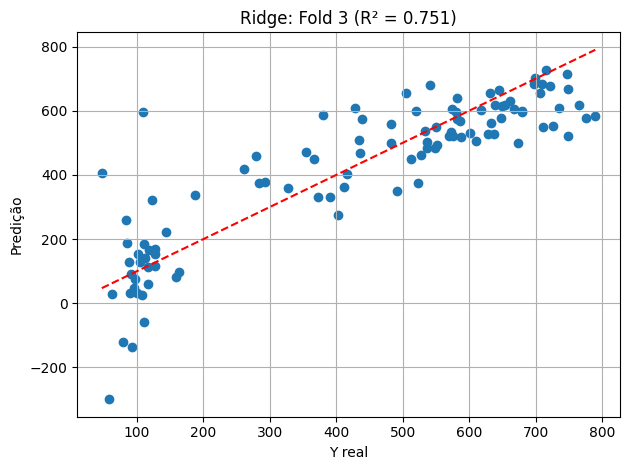

Fold 4: alpha = 65.79332, R2 = 0.7431, RMSE = 116.231


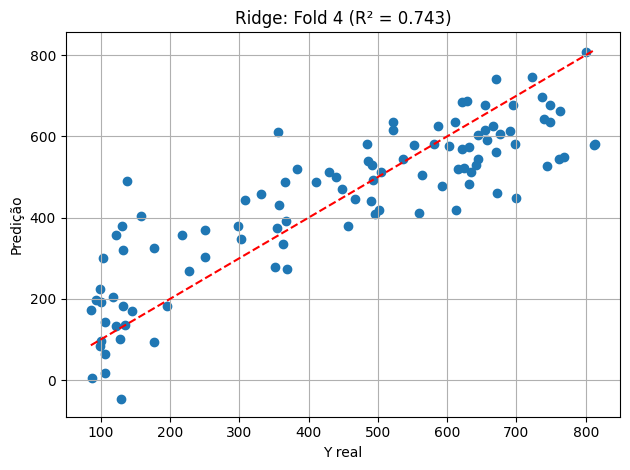

Fold 5: alpha = 65.79332, R2 = 0.7731, RMSE = 112.070


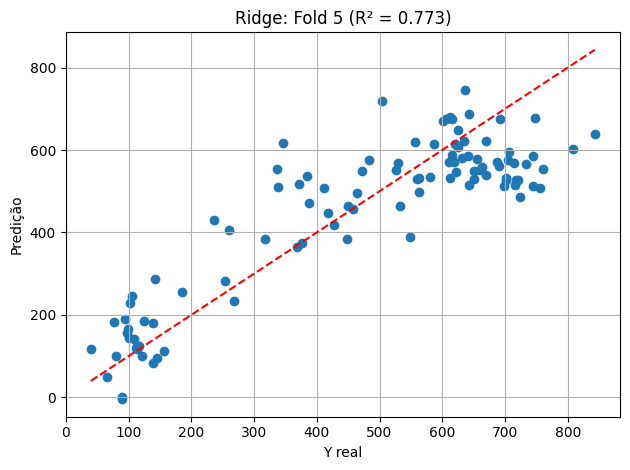


R2 médio no K-Fold: 0.7062943198534252
Desvio padrão do R2: 0.07194302088210917


In [ ]:
# --- RIDGE REGRESSION ---

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    # separa treino e teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RidgeCV
    ridge = make_pipeline(
        StandardScaler(),
        RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)  # faz cv para escolher alpha
    )

    ridge.fit(X_train, y_train)

    # previsão
    y_pred = ridge.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    # alpha escolhido
    alpha_escolhido = ridge.named_steps['ridgecv'].alpha_

    print(f"Fold {fold}: alpha = {alpha_escolhido:.5f}, R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Ridge: Fold {fold} (R² = {R2:.3f})")

    # linha y = x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

# Resultados

r2_ridge = np.mean(lista_r2)
r2_dp_ridge = np.std(lista_r2)
rmse_ridge = np.mean(lista_rmse)
rmse_dp_ridge = np.std(lista_rmse)

print("\nR2 médio no K-Fold:", r2_ridge)
print("Desvio padrão do R2:", r2_dp_ridge)


Fold 1: alpha = 4.83293, l1_ratio = 1.00, R2 = 0.8031, RMSE = 95.344


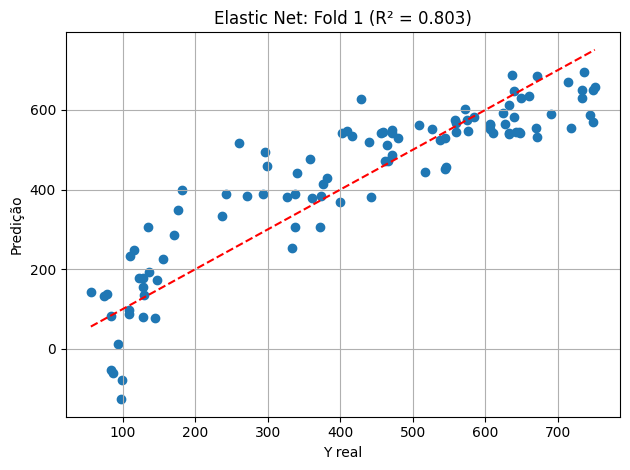

Fold 2: alpha = 4.83293, l1_ratio = 1.00, R2 = 0.7436, RMSE = 115.940


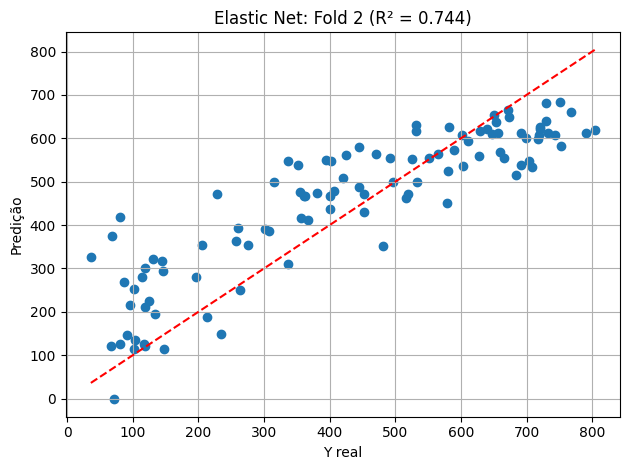

Fold 3: alpha = 4.83293, l1_ratio = 1.00, R2 = 0.8040, RMSE = 105.355


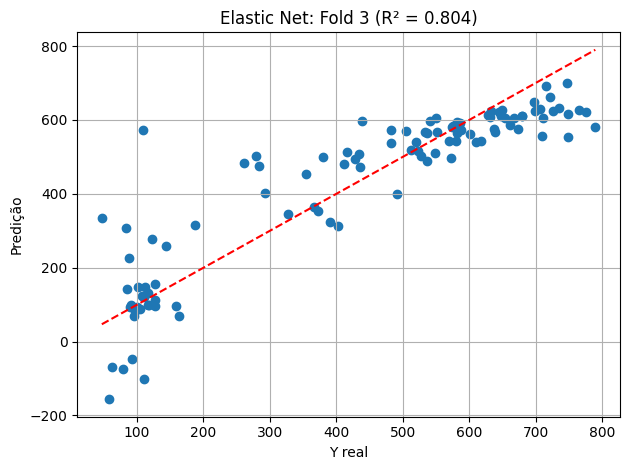

Fold 4: alpha = 4.83293, l1_ratio = 1.00, R2 = 0.8074, RMSE = 100.633


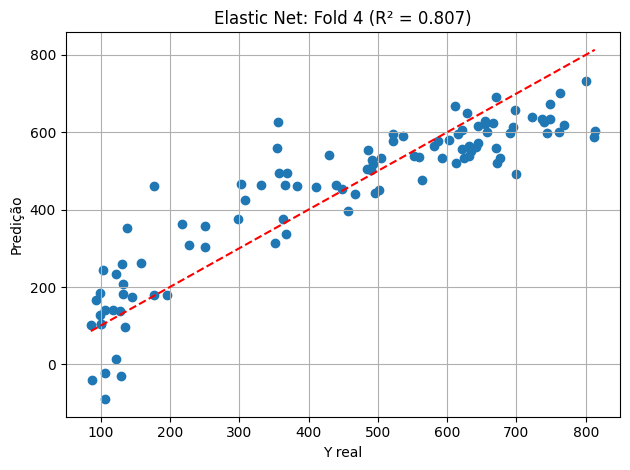

Fold 5: alpha = 4.83293, l1_ratio = 1.00, R2 = 0.8230, RMSE = 98.991


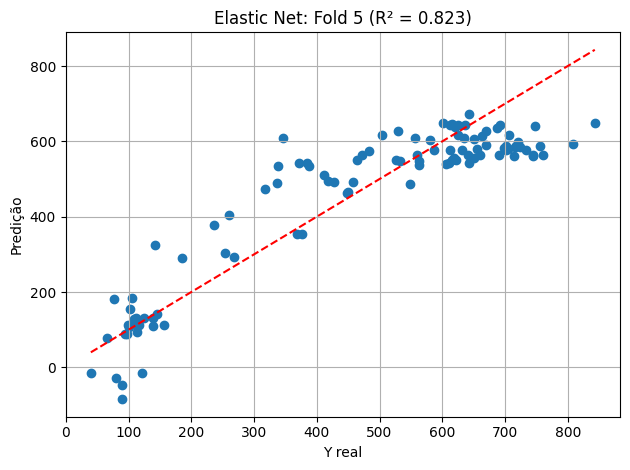


R2 médio no K-Fold: 0.7962426823270148
Desvio padrão do R2: 0.02727016181883762


In [ ]:
# --- ELASTIC NET REGRESSION ---

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    # separa treino e teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # modelo com pipeline (padronização + ElasticNetCV)
    elastic = make_pipeline(
        StandardScaler(),
        ElasticNetCV(
            l1_ratio=[0.2, 0.5, 0.8, 1],   # proporção entre L1 e L2
            alphas=np.logspace(-3, 2, 20), # força da regularização
            cv=5,                           # validação cruzada interna para escolher alpha e l1_ratio
            max_iter=100000,
            random_state=42
        )
    )

    elastic.fit(X_train, y_train)

    # previsão
    y_pred = elastic.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    # parâmetros escolhidos
    modelo_cv = elastic.named_steps['elasticnetcv']
    print(f"Fold {fold}: alpha = {modelo_cv.alpha_:.5f}, l1_ratio = {modelo_cv.l1_ratio_:.2f}, R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Elastic Net: Fold {fold} (R² = {R2:.3f})")

    # linha y = x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

# Resultados

r2_elastic_net = np.mean(lista_r2)
r2_dp_elastic_net = np.std(lista_r2)
rmse_elastic_net = np.mean(lista_rmse)
rmse_dp_elastic_net = np.std(lista_rmse)

print("\nR2 médio no K-Fold:", r2_elastic_net)
print("Desvio padrão do R2:", r2_dp_elastic_net)


Fold 1: R2 = 0.8710, RMSE = 77.189


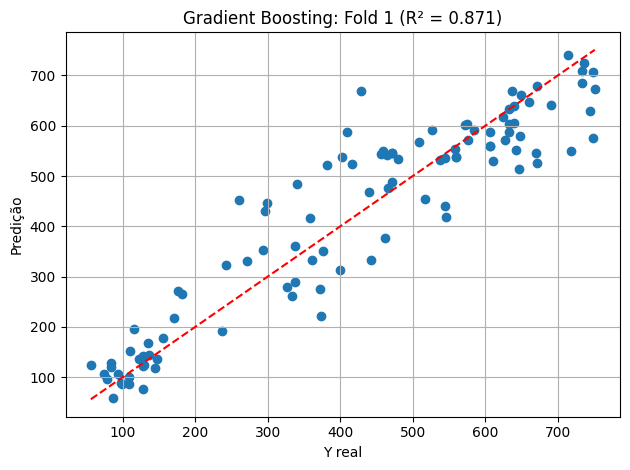

Fold 2: R2 = 0.8242, RMSE = 96.011


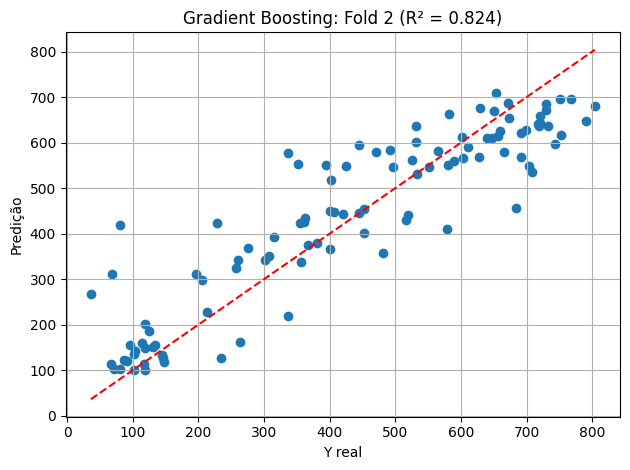

Fold 3: R2 = 0.8548, RMSE = 90.688


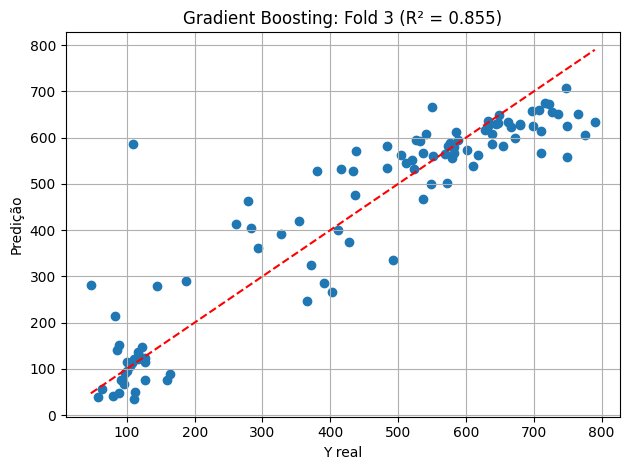

Fold 4: R2 = 0.8619, RMSE = 85.212


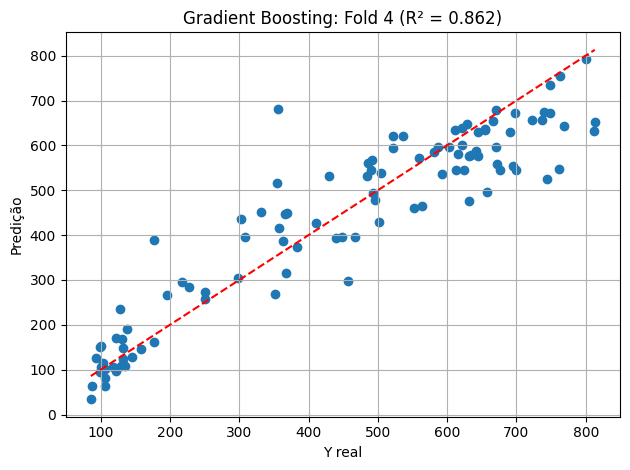

Fold 5: R2 = 0.8679, RMSE = 85.499


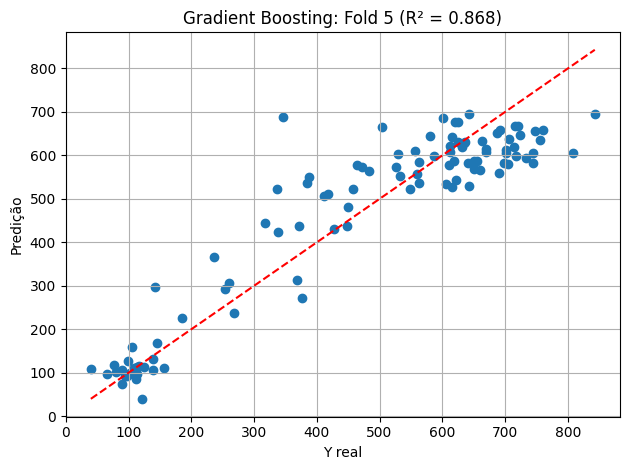


R2 médio no K-Fold: 0.8559665522422766
Desvio padrão do R2: 0.016829372472278486


In [ ]:
# --- GRADIENT BOOSTING REGRESSOR ---

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    gb = GradientBoostingRegressor(
        n_estimators=200,      # número de árvores
        learning_rate=0.05,    # taxa de aprendizado
        max_depth=3,           # profundidade das árvores
        subsample=0.8,         # amostragem parcial para evitar overfitting
        random_state=42
    )

    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Gradient Boosting: Fold {fold} (R² = {R2:.3f})")
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

r2_gradient_boosting = np.mean(lista_r2)
r2_dp_gradient_boosting = np.std(lista_r2)
rmse_gradient_boosting = np.mean(lista_rmse)
rmse_dp_gradient_boosting = np.std(lista_rmse)

print("\nR2 médio no K-Fold:", r2_gradient_boosting)
print("Desvio padrão do R2:", r2_dp_gradient_boosting)


Fold 1: R2 = 0.8648, RMSE = 79.013


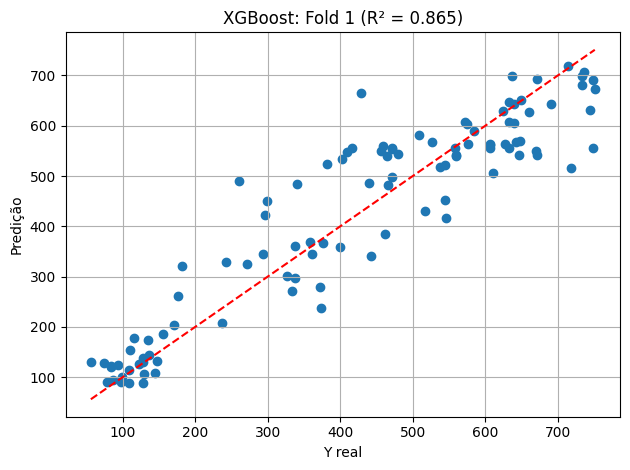

Fold 2: R2 = 0.8295, RMSE = 94.553


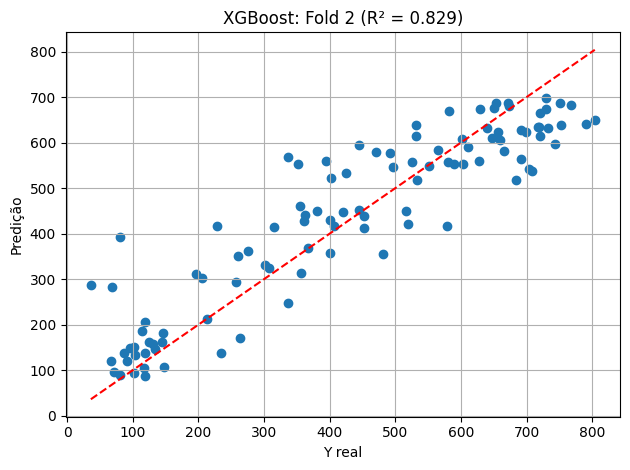

Fold 3: R2 = 0.8633, RMSE = 88.010


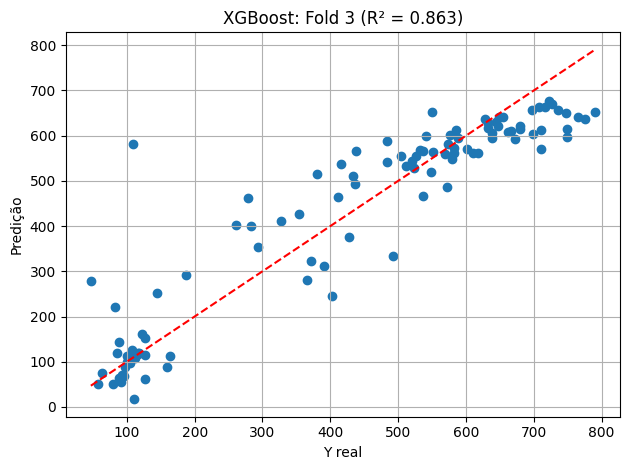

Fold 4: R2 = 0.8667, RMSE = 83.737


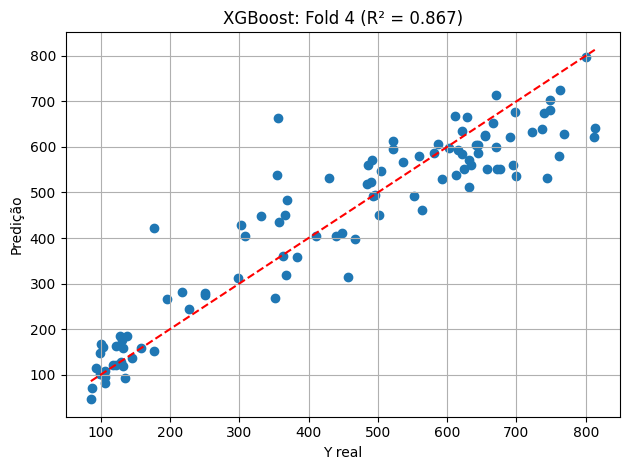

Fold 5: R2 = 0.8711, RMSE = 84.464


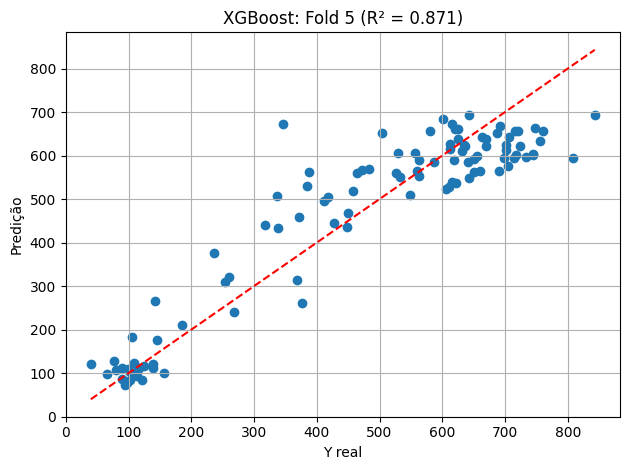


R2 médio no K-Fold: 0.8590650169967855
Desvio padrão do R2: 0.015027615716303604


In [ ]:
# --- XGBOOST REGRESSOR ---

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo XGBoost
    xgb = XGBRegressor(
        n_estimators=200,       # número de árvores
        learning_rate=0.05,     # taxa de aprendizado
        max_depth=3,            # profundidade máxima das árvores
        subsample=0.8,          # fração de amostras usadas em cada árvore
        colsample_bytree=0.8,   # fração de features usadas em cada árvore
        random_state=42,
        objective='reg:squarederror',  # função de perda para regressão
        n_jobs=-1               # usa todos os núcleos disponíveis
    )

    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"XGBoost: Fold {fold} (R² = {R2:.3f})")
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

r2_xgboost = np.mean(lista_r2)
r2_dp_xgboost = np.std(lista_r2)
rmse_xgboost = np.mean(lista_rmse)
rmse_dp_xgboost = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_xgboost)
print("Desvio padrão do R2:", r2_dp_xgboost)

Fold 1: R2 = 0.8661, RMSE = 78.642


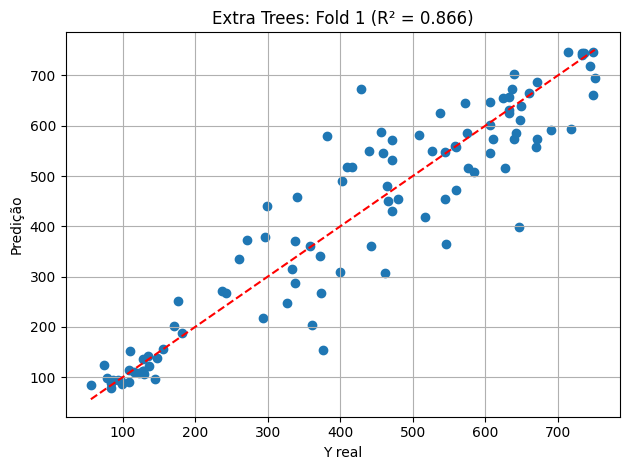

Fold 2: R2 = 0.7563, RMSE = 113.027


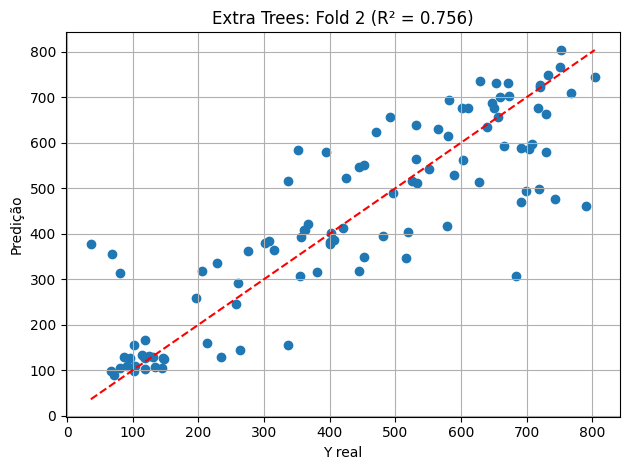

Fold 3: R2 = 0.8197, RMSE = 101.058


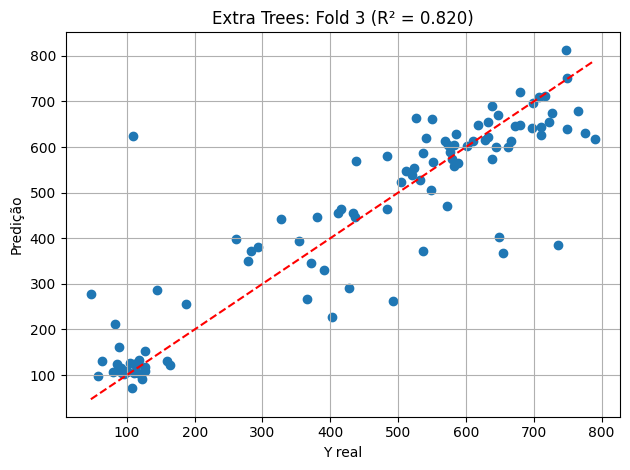

Fold 4: R2 = 0.8381, RMSE = 92.270


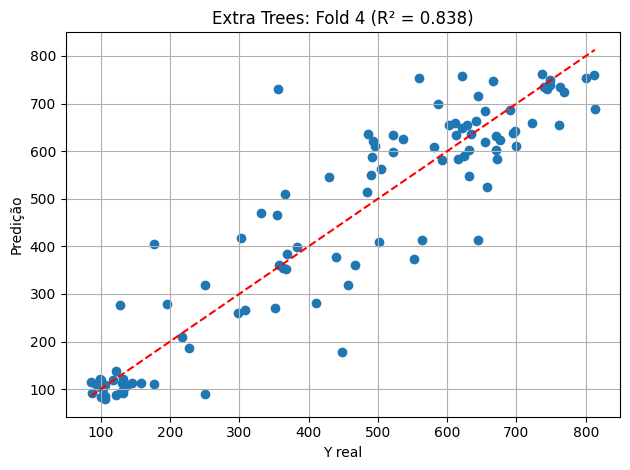

Fold 5: R2 = 0.8532, RMSE = 90.134


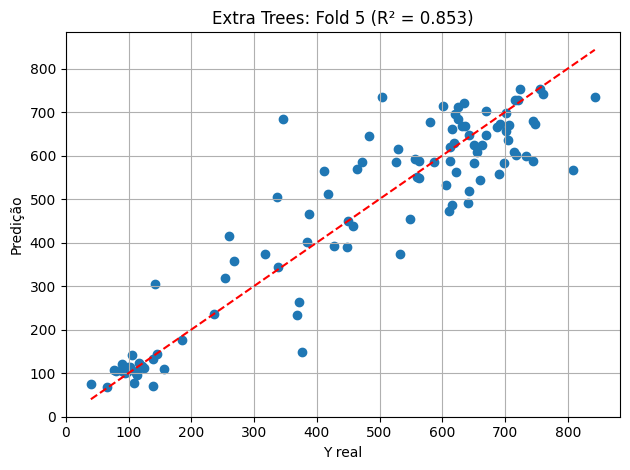


R2 médio no K-Fold: 0.8266905328775316
Desvio padrão do R2: 0.03843216018197405


In [ ]:
# --- EXTRA TREES REGRESSOR ---

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo Extra Trees
    et = ExtraTreesRegressor(
        n_estimators=200,     # número de árvores
        max_depth=None,       # profundidade máxima
        min_samples_split=2,  # mínimo de amostras para dividir um nó
        min_samples_leaf=1,   # mínimo de amostras por folha
        max_features=None,    # número de features consideradas por split
        bootstrap=False,      # usa toda a amostra em vez de bootstrap
        random_state=42,
        n_jobs=-1             # usa todos os núcleos disponíveis
    )

    et.fit(X_train, y_train)
    y_pred = et.predict(X_test)

    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Extra Trees: Fold {fold} (R² = {R2:.3f})")
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

r2_extra_trees = np.mean(lista_r2)
r2_dp_extra_trees = np.std(lista_r2)
rmse_extra_trees = np.mean(lista_rmse)
rmse_dp_extra_trees = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_extra_trees)
print("Desvio padrão do R2:", r2_dp_extra_trees)
#print("RMSE médio:", rmse_extra_trees)
#print("Desvio padrão do RMSE:", rmse_dp_extra_trees)


In [ ]:
#COMPARAR ALGORITMOS

import pandas as pd

resultados = {
    'Modelo': [
        'Regressão Linear', 'Lasso', 'Decision Tree', 'Random Forest',
        'Ridge', 'Elastic Net', 'Gradient Boosting', 'XGBoost', 'Extra Trees'
    ],
    'R² médio': [
        r2_reg_lin_mult, r2_lasso, r2_decision_tree, r2_random_forest,
        r2_ridge, r2_elastic_net, r2_gradient_boosting, r2_xgboost, r2_extra_trees
    ],
    'R² DP': [
        r2_dp_reg_lin_mult, r2_dp_lasso, r2_dp_decision_tree, r2_dp_random_forest,
        r2_dp_ridge, r2_dp_elastic_net, r2_dp_gradient_boosting, r2_dp_xgboost, r2_dp_extra_trees
    ],
    'RMSE médio': [
        rmse_reg_lin_mult, rmse_lasso, rmse_decision_tree, rmse_random_forest,
        rmse_ridge, rmse_elastic_net, rmse_gradient_boosting, rmse_xgboost, rmse_extra_trees
    ],
    'RMSE DP': [
        rmse_dp_reg_lin_mult, rmse_dp_lasso, rmse_dp_decision_tree, rmse_dp_random_forest,
        rmse_dp_ridge, rmse_dp_elastic_net, rmse_dp_gradient_boosting, rmse_dp_xgboost, rmse_dp_extra_trees
    ]
}

tabela = pd.DataFrame(resultados)
print(tabela.round(5))


              Modelo  R² médio    R² DP  RMSE médio   RMSE DP
0   Regressão Linear   0.64593  0.06670   135.58195  11.01790
1              Lasso   0.79534  0.02977   103.48505   8.17976
2      Decision Tree   0.80595  0.02308   100.87417   7.32841
3      Random Forest   0.86292  0.01487    84.73123   4.68053
4              Ridge   0.70629  0.07194   123.21654  13.47057
5        Elastic Net   0.79624  0.02727   103.25263   7.11284
6  Gradient Boosting   0.85597  0.01683    86.91990   6.26853
7            XGBoost   0.85907  0.01503    85.95563   5.16693
8        Extra Trees   0.82669  0.03843    95.02645  11.49243


In [ ]:
# As regressões lineares com regularização (Lasso, Ridge e Elastic Net) demoram mais para rodar
# O modelos baseados em árvores de decisão são mais rápidos

Modelo final (com o dataset inteiro como treino)

In [ ]:
# Modelo LASSO

from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=None, cv=5, max_iter=100000,random_state=42)
lasso.fit(X, y)

LassoCV(cv=5, max_iter=100000, random_state=42)

In [ ]:
#Importância

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

coef = lasso.coef_
features = X_original.columns

df_coef = pd.DataFrame({
    'feature': features,
    'coef': coef
}).sort_values('coef')

df_alimentos = df_coef[df_coef['feature'].str.contains(
    'prato|guarn|salada|sobremesa', regex=True
)]

df_alimentos

,feature,coef
69,prato_principal_1_Filé de peixe,-85.574506
161,guarnição_Virado,-20.366860
169,sobremesa_1_Bolinho,-13.746831
59,prato_principal_1_Carne em cubos,-12.447114
206,sobremesa_1_Romeu,-10.498184
131,prato_principal_2_Suflê de legumes,-7.624688
151,guarnição_Legumes,-5.009808
125,prato_principal_2_Ovo frito,-3.898279
110,prato_principal_2_Grão de bico,-2.929512
56,prato_principal_1_Bife,-2.829090


In [ ]:
# Modelo XGBoost

xgb = XGBRegressor(
        n_estimators=200,       # número de árvores
        learning_rate=0.05,     # taxa de aprendizado
        max_depth=3,            # profundidade máxima das árvores
        subsample=0.8,          # fração de amostras usadas em cada árvore
        colsample_bytree=0.8,   # fração de features usadas em cada árvore
        random_state=42,
        objective='reg:squarederror',  # função de perda para regressão
        n_jobs=-1               # usa todos os núcleos disponíveis
    )

xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
#Modelo Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
        n_estimators=200,      # número de árvores
        learning_rate=0.05,    # taxa de aprendizado
        max_depth=3,           # profundidade das árvores
        subsample=0.8,         # amostragem parcial para evitar overfitting
        random_state=42
    )

gb.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42,
                          subsample=0.8)

In [ ]:
#Modelo Elastic Net

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

elastic = make_pipeline(
        StandardScaler(),
        ElasticNetCV(
            l1_ratio=[0.05],   # proporção entre L1 e L2
            alphas=np.logspace(-3, 2, 20), # força da regularização
            cv=5,                           # validação cruzada interna para escolher alpha e l1_ratio
            max_iter=100000,
            random_state=42
        )
    )

elastic.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02]),
                              cv=5, l1_ratio=[0.05], max_iter=100000,
                              random_state=42))])

In [ ]:
#Coeficientes

coef = elastic.named_steps["elasticnetcv"].coef_
features = X_original.columns
df_coef = pd.DataFrame({
    "feature": features,
    "coef": coef
}).sort_values("coef")

#Filtrar apenas as variáveis de alimentos
df_alimentos = df_coef[
    df_coef["feature"].str.contains("prato|guarn|salada|sobremesa", regex=True)
]

df_alimentos
#df_coef

,feature,coef
69,prato_principal_1_Filé de peixe,-14.667488
206,sobremesa_1_Romeu,-14.638411
196,sobremesa_1_Ovo de páscoa,-14.351013
190,sobremesa_1_Marigel,-11.222776
163,sobremesa_1_Alfajor,-10.653927
94,prato_principal_2_Batatalhoada,-10.502621
59,prato_principal_1_Carne em cubos,-9.974165
98,prato_principal_2_Bife de lentilha,-9.356944
172,sobremesa_1_Canjica,-9.347693
180,sobremesa_1_Doce de goiabada,-8.719961


In [ ]:
#---OBSERVAÇÕES ESPECÍFICAS---

nova_obs = pd.DataFrame({
    'Precipitacao_mm':[0],
    'Temp_max_C':[25],
    'Temp_min_C':[20],
    'Umid_rel_ar':[50],
    'Vento_velocidade_horaria (m/s)': [3],
    'Vento_rajada_maxima (m/s)': [3],
    'Dia_mês': ['25'],
    'Dia_semana': ['ter'],
    'Mês': ['5'],
    'prato_principal_1':['lasanha à bolonhesa'],
    'prato_principal_2': ['curry de legumes'],
    'guarnição': ['legumes sautê'],
    'sobremesa_1': ['goiabada']
})

nova_obs = pd.get_dummies(nova_obs)
# Reindexa para garantir mesmo formato do treino
nova_obs = nova_obs.reindex(columns=atributos, fill_value=0)

print("Predição lasso:", lasso.predict(nova_obs))
print("Predição xgboost:", xgb.predict(nova_obs))
print("Predição gradient boosting:", gb.predict(nova_obs))
print("Predição elastic net:", elastic.predict(nova_obs))
print('\n')

Predição lasso: [274.40947777]
Predição xgboost: [151.22269]
Predição gradient boosting: [151.06100857]
Predição elastic net: [314.90390046]




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
